In [7]:
import matplotlib.pyplot as plt

def get_rdf_values(pressure, pair):
    directory = 'D:/MSc/summer_project/p' + str(pressure)
    file_path = directory + '/rdf.out' + pair + '.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()
        x_values = []
        y_values = []
        for line in data:
            x, y = map(float, line.split())
            x_values.append(x)
            y_values.append(y)
    return x_values, y_values
    
def plot_rdf(pair,pressure, x_values,y_values):
    label = 'P' + str(pressure)
    colour = 'red'
    plt.plot(x_values, y_values, label = label, color = colour)

    plt.legend()
    plt.xlim(-1,30)
    plt.ylim(-0.2,20)
    plt.xlabel('r [$a_0$]')
    plt.ylabel('g(r)')
    plt.grid(True)

    title_label = ''
    for character in pair[:-1]:
        if character == '1':
            title_label += 'O-'
        elif character == '2':
            title_label += 'C-'
        elif character == '3':
            title_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    title_label = title_label[:-1]
    plt.title('Radial Distribution Functions for ' + title_label)

######################

def find_max(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'black', markersize = 100)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'black', markersize = 100)
    max_index = None
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        highest_value = max(y_values[lower_index:upper_index])
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == highest_value:
                print('The first maximum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1])+'.')
                max_index = index + lower_index
                break
    return max_index


x	y
100 	 4.019999910146 	 0.26086197197566
101 	 4.05999990925193 	 0.42013565259693
102 	 4.09999990835786 	 0.661636006104711
103 	 4.13999990746379 	 0.898452040662077
104 	 4.17999990656972 	 1.19015914641412
105 	 4.21999990567565 	 1.49720592798724
106 	 4.25999990478158 	 1.73871762161949
107 	 4.29999990388751 	 1.93323908058032
108 	 4.33999990299344 	 2.17546547487793
109 	 4.37999990209937 	 2.25205905929201
110 	 4.4199999012053 	 2.28397430494093
111 	 4.45999990031123 	 2.34500230672877
112 	 4.49999989941716 	 2.29464021958297
113 	 4.53999989852309 	 2.26079737511266
114 	 4.57999989762902 	 2.21540377781279
115 	 4.61999989673495 	 2.17145766727812
116 	 4.65999989584088 	 2.0656442555863
117 	 4.69999989494681 	 1.9797721590653
118 	 4.73999989405274 	 1.92443745902749
119 	 4.77999989315867 	 1.8584797935596
120 	 4.8199998922646 	 1.76842814434598
121 	 4.85999989137053 	 1.71725299182901
122 	 4.89999989047647 	 1.69758870115019
123 	 4.9399998895824 	 1.655506975

111

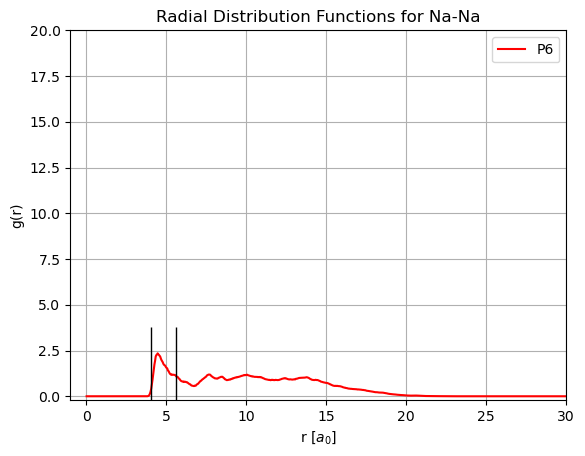

In [51]:
pressure = 6
pair = '331' #pairs = ['111','121', '131', '221', '231','331']

lower_index = 100
upper_index = 140

x_values, y_values = get_rdf_values(pressure, pair)
plot_rdf(pair,pressure,x_values,y_values)
find_max(lower_index, upper_index, x_values, y_values)

In [9]:
import numpy as np

p1_separations = np.array([3.97999991104007,2.61999994143844, 4.45999990031123, 6.53999985381961, 5.77999987080693, 6.09999986365438])
p2_separations = np.array([3.97999991104007,2.61999994143844, 4.37999990209937, 6.13999986276031, 5.65999987348914, 5.89999986812472])
p3_separations = np.array([3.93999991193414,2.61999994143844, 4.29999990388751, 5.45999987795949, 5.45999987795949, 5.45999987795949])
p4_separations = np.array([3.89999991282821,2.61999994143844, 4.09999990835786, 5.17999988421798, 5.21999988332391, 5.29999988153577])
p5_separations = np.array([3.85999991372228,2.61999994143844, 4.05999990925193, 5.13999988511205, 5.21999988332391, 4.69999989494681])
p6_separations = np.array([3.81999991461635,2.57999994233251, 3.89999991282821,5.01999988779426, 5.01999988779426, 4.45999990031123])

all_p_separations = [p1_separations, p2_separations,p3_separations,p4_separations, p5_separations, p6_separations]
all_mean_separations = [np.mean(x) for x in all_p_separations]

Text(0, 0.5, 'Distance [$a_0$]')

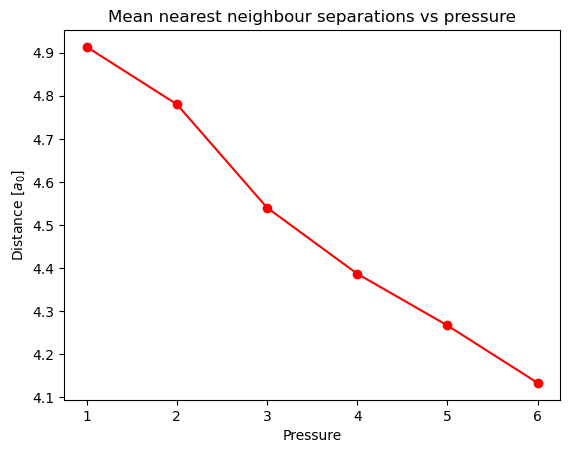

In [15]:
plt.plot([x for x in range(1,7)], all_mean_separations, color = 'red', marker = 'o')
plt.title('Mean nearest neighbour separations vs pressure')
plt.xlabel('Pressure')
plt.ylabel('Distance [$a_0$]')